## Marketing Campaign Model Evaluation
**Name:** Abhijith Nallana <br>
**Date:** 13th October, 2024 <br>
**Course:** Machine Learning <br>

## Introduction

The purpose of this report is to predict customer responses to a marketing campaign using various machine learning techniques. The goal is to accurately identify which customers are likely to respond to the campaign, enabling better allocation of marketing resources. <br>
We will evaluate three classification models: 
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Support Vector Classifier (SVC).

Each model will be assessed based on its ability to balance recall and precision, with a primary focus on recall since missing potential responders is more costly for the business.


### **False Positives (FP), False Negatives (FN), and Associated Metrics:** <br>
In the context of a marketing campaign, the goal is to predict which customers are likely to respond positively to the campaign, such as purchasing a product or signing up for a service. The terms False Positive (FP) and False Negative (FN) help assess how accurate these predictions are.
- #### **False Positive (FP):** <br>
A False Positive occurs when the model predicts that a customer **will respond to the campaign**, but in reality, they do not. While the company spends resources targeting these customers (sending them advertisements or offers), this error results in wasted marketing expenses.
- #### **False Negative (FN):** <br>
A False Negative occurs when the model predicts that a customer **will not respond to the campaign**, but in reality, they would have if contacted. This is much more costly than an FP, because the company misses out on a potential customer who could have made a purchase or engaged with the campaign. This results in a lost opportunity, which has a more significant impact on business outcomes, such as revenue loss.

In marketing campaigns, false negatives are particularly harmful as the business goal is to maximize customer engagement and sales. Missing out on customers who would have responded reduces the overall effectiveness of the campaign.

### **Associated Metrics in the Marketing Campaign Context:** <br>
- #### **Precision:** <br>
Precision is the ratio of correctly predicted positive responses to all predicted positive responses.

    - Precision = True Positives (TP) / (True Positives (TP) + False Positives (FP))

In the marketing campaign, precision answers the question: "Of all the customers predicted to respond to the campaign, how many actually responded?" High precision means that the marketing resources are being well-targeted.

- #### **Recall:** <br>
Recall is the ratio of correctly predicted positive responses to all actual positive responses.

    - Recall = True Positives (TP) / (True Positives (TP) + False Negatives (FN))

Recall is especially important in this marketing scenario because it focuses on minimizing false negatives. A high recall means that the model is identifying most of the potential responders, which is crucial for reducing missed opportunities.

- #### **Accuracy:** <br>
Accuracy is the ratio of correctly predicted outcomes (both positives and negatives) to the total number of predictions.

    - Accuracy = (True Positives (TP) + True Negatives (TN)) / Total Predictions

While accuracy provides a general measure of the model’s performance, it can be misleading in imbalanced datasets. For example, if the majority of customers don’t respond to a campaign, a model predicting non-responders could have high accuracy but poor recall. Therefore, accuracy is not the most relevant metric when false negatives are the priority.

- #### **F1 Score:** <br> 
The F1 Score is the harmonic mean of precision and recall, providing a balanced measure between the two.

    - F1 Score = 2 × ((Precision × Recall) / (Precision + Recall))

The F1 Score balances precision and recall, but in this scenario, recall should take precedence. However, F1 is still useful when you want to balance both precision and recall in model evaluation.

- #### **AUC (Area Under the Curve):** <br>
There are two types of AUCs commonly used:

1. **ROC-AUC (Receiver Operating Characteristic - Area Under Curve):** This metric helps assess the trade-off between true positive and false positive rates.
2. **Precision-Recall AUC:** Since we are focusing on recall and have an imbalanced dataset, Precision-Recall AUC is more relevant in this scenario. It emphasizes correctly identifying positive responders, even when there are many non-responders.

### **Confusion Matrix and Evaluation Metrics**
The confusion matrix consists of four quadrants:

- **True Positives (TP):** Customers correctly predicted to respond.
- **True Negatives (TN):** Customers correctly predicted not to respond.
- **False Positives (FP):** Customers predicted to respond but did not.
- **False Negatives (FN):** Customers predicted not to respond but actually did.

### **Why Recall Should Be the Primary Focus:** <br>
In this marketing campaign, recall is critical because false negatives are the most costly type of error. Missing a potential customer who could have been converted to a sale has a direct impact on revenue. By improving recall, the company ensures that most potential customers are targeted, thus maximizing the effectiveness of the campaign.

For this reason, even if improving recall slightly lowers precision (i.e., increases the number of false positives), the trade-off is worthwhile because the cost of sending marketing material to uninterested customers (FPs) is much lower than the cost of missing out on customers who would respond (FNs).

## Assumptions

- The dataset used for this analysis is synthetic, created using the `make_classification` function from `scikit-learn` to simulate a binary classification problem.
- We assume that customers who respond to the campaign are considered positive class labels (1), and those who do not respond are labeled as the negative class (0).
- In this analysis, **Recall** is prioritized over **Precision**, as missing potential customers (false negatives) is more costly than sending marketing materials to uninterested individuals (false positives).


## Methodology

## 1. Data Generation
We generate a synthetic dataset using `make_classification` with 1,000 samples and two informative features. The data represents a binary classification problem, where the goal is to predict customer responses to a marketing campaign.


### 1.1. Import the libraries needed

In [1]:
import matplotlib.pyplot as plt

### 1.2. Generate Synthetic Data
We generate a synthetic dataset with features and labels to simulate a binary classification problem, representing customers for a marketing campaign.

In [2]:
# Importing make_classification
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

1. **make_classification:** This function creates a synthetic dataset for binary classification problems.
- n_samples=1000: Generate 1,000 data points (rows).
- n_features=2: Each data point will have two features.
- n_informative=2: Both features will be informative for the classification task.
- n_redundant=0: There will be no redundant features (i.e., no linear combinations of the informative features).
- n_clusters_per_class=1: Each class will have a single cluster of points.
- random_state=42: Ensures the data is generated in a reproducible manner by fixing the random seed.
2. **X:** Feature matrix (1000 rows × 2 columns).
3. **y:** Target vector indicating the class labels (0 or 1).

### 2. Data Standardization
We split the data into training and testing sets to train the model and later evaluate its performance on unseen data.

In [3]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 3. Standardize the Data

We standardize the feature values to ensure they are on the same scale.

In [4]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Plot the Dataset
We visualize the training data to better understand the distribution of the features and how they relate to the target classes (potential customers).

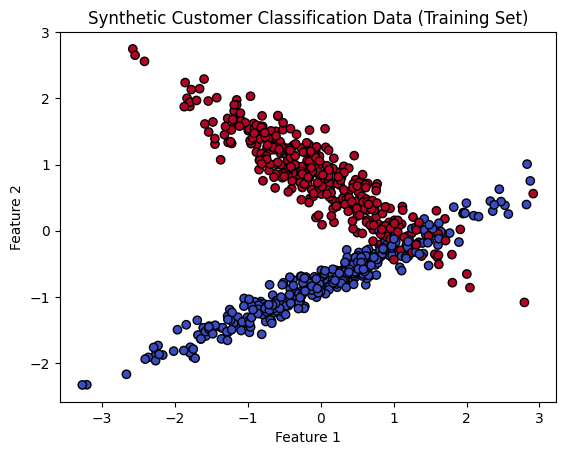

In [5]:
# Plot the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k')
plt.title("Synthetic Customer Classification Data (Training Set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### 4. Model Training and Evaluation
Logistic Regression
We will train the Logistic Regression model and evaluate it based on the defined metrics.

In [6]:
# Fit the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

- ### Fitting Logistic Regression model:
A linear model used for binary classification, predicting the likelihood of a customer responding to the marketing campaign.

In [7]:
# Fitting Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

- ### Fitting KNN model
A non-parametric model that classifies customers based on the proximity to their nearest neighbors in the feature space.

In [8]:
# Fitting KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

- ### Fitting SVC model
Another model used for classification, with probability=True indicating that it can output probability estimates for class membership.

In [9]:
# Fitting SVC model
svc = SVC(probability=True)
svc.fit(X_train, y_train)

SVC(probability=True)

### 4.1. Make Predictions

We use the trained models to predict the responses of the customers in the testing set (X_test). Each model generates predictions based on the features of unseen data, simulating which customers are likely to respond to the marketing campaign.

In [10]:
# 3. Make predictions
y_pred_logreg = log_reg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)

### 4.2. Evaluate the Models

This block begins the evaluation by calculating the confusion matrix for Logistic Regression. The confusion matrix shows how many true positives, true negatives, false positives, and false negatives the model predicted, which is crucial for evaluating model performance in a classification task.

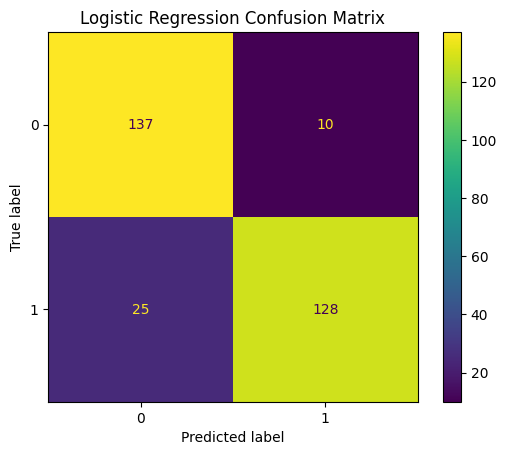

In [11]:
# 4. Evaluate the models
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay

# Logistic Regression confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg)
disp.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

### 4.3. Logistic Regression Evaluation

We calculate several evaluation metrics for Logistic Regression:
- Precision: Measures the proportion of true positives out of all predicted positives.
- Recall: Focuses on minimizing false negatives by measuring the proportion of true positives out of all actual positives.
- F1 Score: Harmonic mean of precision and recall, balancing their trade-off.
- Accuracy: Measures how often the model correctly predicted both positive and negative classes overall.

In [12]:
# Logistic Regression evaluation
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print("Logistic Regression")
print(f"Confusion Matrix: \n{cm_logreg}")
print(f"Precision: {precision_logreg}")
print(f"Recall: {recall_logreg}")
print(f"F1 Score: {f1_logreg}")
print(f"Accuracy: {accuracy_logreg}\n")

Logistic Regression
Confusion Matrix: 
[[137  10]
 [ 25 128]]
Precision: 0.927536231884058
Recall: 0.8366013071895425
F1 Score: 0.8797250859106529
Accuracy: 0.8833333333333333



- **True Negatives (TN) [137]:** The model correctly predicted that 137 customers would not respond to the marketing campaign.
- **False Positives (FP) [10]:** The model incorrectly predicted that 10 customers would respond, but they did not.
- **False Negatives (FN) [25]:** The model incorrectly predicted that 25 customers would not respond, but they actually did.
- **True Positives (TP) [128]:** The model correctly predicted that 128 customers would respond to the marketing campaign.
<br>

- **Precision (0.93):**
Precision = TP / (TP + FP) = 128 / (128 + 10)
Precision is 92.75%, meaning when the model predicts a customer will respond, it is correct 92.75% of the time.
- **Recall (0.84):**
Recall = TP / (TP + FN) = 128 / (128 + 25)
Recall is 83.66%, meaning the model correctly identifies 83.66% of all the customers who would actually respond (minimizing false negatives, which is critical in this context).
- **F1 Score (0.88):**
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
The F1 score of 0.88 is a balance between precision and recall, making it a good metric when both false positives and false negatives are important, but here it focuses on recall more heavily.
- **Accuracy (0.88):**
Accuracy = (TP + TN) / (Total) = (128 + 137) / 300
Accuracy is 88.33%, indicating that the model is correct 88.33% of the time overall, but in this marketing campaign, accuracy is less relevant compared to recall.

### 4.4. KNN Model Evaluation

The below code makes predictions using the KNN model (knn.predict(X_test)) on the test data, and then computes the confusion matrix (confusion_matrix) based on the true labels (y_test) and the predicted labels (y_pred_knn). Here, the confusion matrix for the KNN model is displayed using ConfusionMatrixDisplay. The matrix will help us visualize the model’s performance in terms of True Positives, True Negatives, False Positives, and False Negatives.

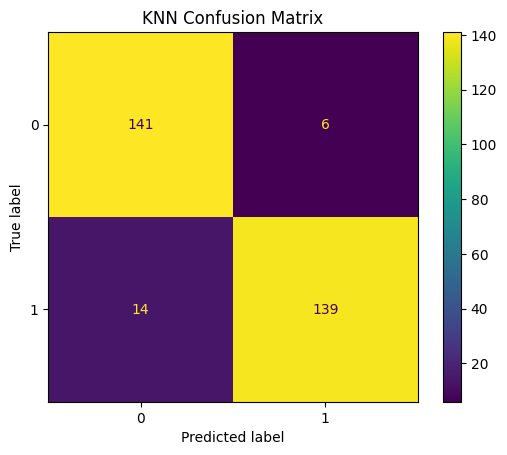

In [13]:
# Evaluate KNN model
y_pred_knn = knn.predict(X_test)  # Predictions on test data
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.title("KNN Confusion Matrix")
plt.show()

The code below calculates key evaluation metrics for the KNN model:

- Precision: How many of the predicted positive responses are correct.
- Recall: How many actual positives were correctly predicted.
- F1 Score: The harmonic mean of Precision and Recall, which balances these two metrics.
- Accuracy: The percentage of correct predictions (both positives and negatives).

In [14]:
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("KNN Evaluation:")
print(f"Confusion Matrix:\n{cm_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")
print(f"Accuracy: {accuracy_knn}\n")

KNN Evaluation:
Confusion Matrix:
[[141   6]
 [ 14 139]]
Precision: 0.9586206896551724
Recall: 0.9084967320261438
F1 Score: 0.9328859060402684
Accuracy: 0.9333333333333333



The output for the KNN Evaluation based on the confusion matrix and other metrics:

- **True Negatives (TN):** 141 
- **False Positives (FP):** 6 
- **False Negatives (FN):** 14 
- **True Positives (TP):** 139
<br>
- **Precision: 0.9586206896551724**

Out of the customers predicted to respond, 95.86% actually did respond.
- **Recall: 0.9084967320261438**

Of the actual responders, 90.85% were correctly predicted by the model. This is crucial in this context because false negatives (missed responders) are costly.
- **F1 Score: 0.9328859060402684**

The F1 score provides a balance between precision and recall. It suggests that this model has a strong trade-off between these two metrics.
- **Accuracy: 0.9333333333333333**

93.33% of all predictions (both responders and non-responders) were correct.

### 4.5. SVC Model Evaluation:

The predictions are made using the SVC model (svc.predict(X_test)), and the confusion matrix is computed based on the test labels and the predictions from the SVC model. This plots the confusion matrix for the SVC model, helping us visualize its classification performance in terms of True Positives, True Negatives, False Positives, and False Negatives.

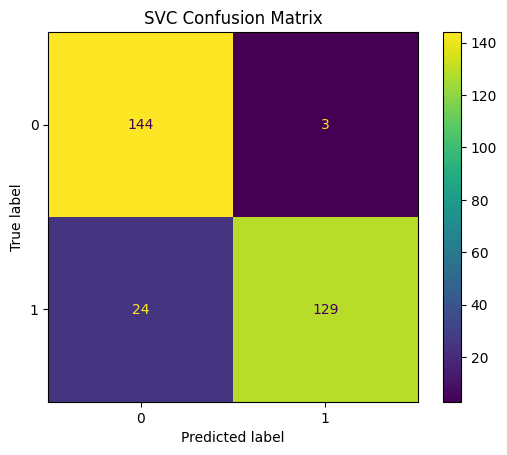

In [15]:
# Evaluate SVC model
y_pred_svc = svc.predict(X_test)  # Use the original SVC model
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp.plot()
plt.title("SVC Confusion Matrix")
plt.show()

The code below calculates key evaluation metrics for the SVC model:

- Precision: How many of the predicted positive responses are correct.
- Recall: How many actual positives were correctly predicted.
- F1 Score: The harmonic mean of Precision and Recall, which balances these two metrics.
- Accuracy: The percentage of correct predictions (both positives and negatives).

In [16]:
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("SVC Evaluation:")
print(f"Confusion Matrix:\n{cm_svc}")
print(f"Precision: {precision_svc}")
print(f"Recall: {recall_svc}")
print(f"F1 Score: {f1_svc}")
print(f"Accuracy: {accuracy_svc}\n")

SVC Evaluation:
Confusion Matrix:
[[144   3]
 [ 24 129]]
Precision: 0.9772727272727273
Recall: 0.8431372549019608
F1 Score: 0.9052631578947369
Accuracy: 0.91



The output for the SVC Evaluation based on the confusion matrix and other metrics:

- **True Negatives (TN):** 144 (correctly predicted non-responders)
- **False Positives (FP):** 3 (incorrectly predicted as responders)
- **False Negatives (FN):** 24 (missed potential responders)
- **True Positives (TP):** 129 (correctly predicted responders)

- **Precision: 0.9772727272727273** <br>
Out of the customers predicted to respond, 97.73% actually did respond. The high precision indicates very few false positives.

- **Recall: 0.8431372549019608** <br>
Of the actual responders, 84.31% were correctly identified. This recall is lower compared to KNN, which suggests that the model misses more responders (false negatives), which is more costly in this context.

- **F1 Score: 0.9052631578947369** <br>
The F1 score indicates a solid balance between precision and recall, but slightly less optimal than KNN, especially in terms of recall.

- **Accuracy: 0.91** <br>
91% of all predictions were correct, which is still a strong performance but not as high as KNN.

### **5. Precision-Recall Curve and AUC Calculation:**
The Precision-Recall Curve visualizes the trade-off between Precision (positive predictive value) and Recall (sensitivity or true positive rate) across different thresholds. It is especially useful when dealing with imbalanced datasets, where one class significantly outnumbers the other. A higher area under the curve (AUC) indicates better model performance.

**Logistic Regression - Precision-Recall Curve:**

1. This block calculates the predicted probabilities (predict_proba) for the Logistic Regression model.
2. It then computes the Precision-Recall curve values using precision_recall_curve.
3. The AUC (Area Under the Curve) for the Precision-Recall curve is calculated using the auc function.
4. Finally, the Precision-Recall curve is plotted, showing how the model performs at different thresholds between Precision and Recall.

In [17]:
# Precision-Recall Curve and AUC Calculation
# importing modules
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

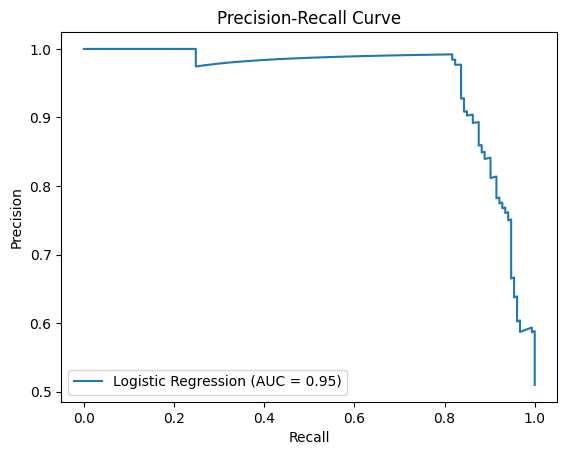

In [18]:
# Precision-Recall Curve and AUC Calculation - Logistic Regression
y_scores_logreg = log_reg.predict_proba(X_test)[:, 1]
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_scores_logreg)
auc_pr_logreg = auc(recall_logreg, precision_logreg)

plt.plot(recall_logreg, precision_logreg, label=f'Logistic Regression (AUC = {auc_pr_logreg:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

**KNN - Precision-Recall Curve:**
- Similar to the Logistic Regression block, this computes the Precision-Recall curve for the KNN model.
- It calculates the AUC for the Precision-Recall curve and plots the curve.

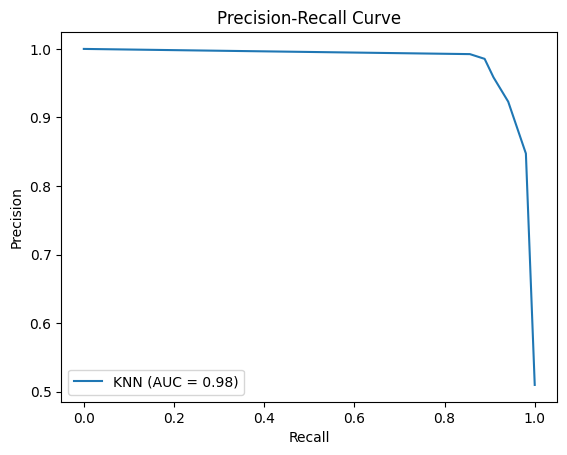

In [19]:
#Precision-Recall Curve and AUC Calculation for KNN
y_scores_knn = knn.predict_proba(X_test)[:, 1]  # Predicted probabilities
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_scores_knn)
auc_pr_knn = auc(recall_knn, precision_knn)

plt.plot(recall_knn, precision_knn, label=f'KNN (AUC = {auc_pr_knn:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

**SVC - Precision-Recall Curve:** <br>
This block calculates the Precision-Recall curve and AUC for the SVC model. The model’s probability predictions are used to generate the curve, and it is plotted similarly to Logistic Regression and KNN.

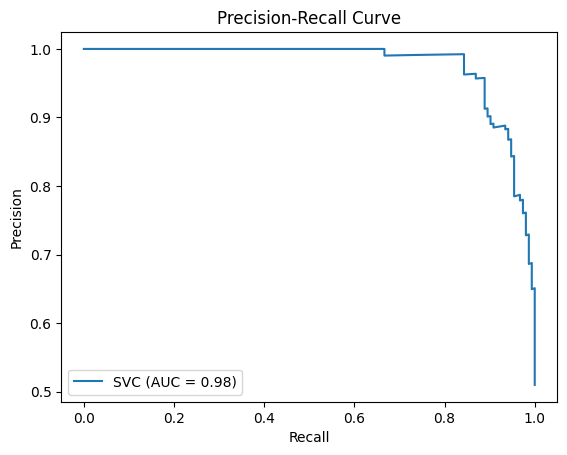

In [20]:
# Precision-Recall Curve and AUC Calculation for SVC
y_scores_svc = svc.predict_proba(X_test)[:, 1]  # Predicted probabilities
precision_svc, recall_svc, _ = precision_recall_curve(y_test, y_scores_svc)
auc_pr_svc = auc(recall_svc, precision_svc)

plt.plot(recall_svc, precision_svc, label=f'SVC (AUC = {auc_pr_svc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### 6. ROC Curve and AUC Calculation

- **Logistic Regression - ROC Curve:**

  1. This block calculates the ROC (Receiver Operating Characteristic) curve for Logistic Regression using roc_curve.
  2. AUC for the ROC curve is also computed to measure the overall performance of the model.
  3. The ROC curve plots the True Positive Rate (Recall) against the False Positive Rate, giving a visual representation of the model’s performance at different thresholds.

In [21]:
# ROC Curve and AUC Calculation
# importing
from sklearn.metrics import roc_curve, auc

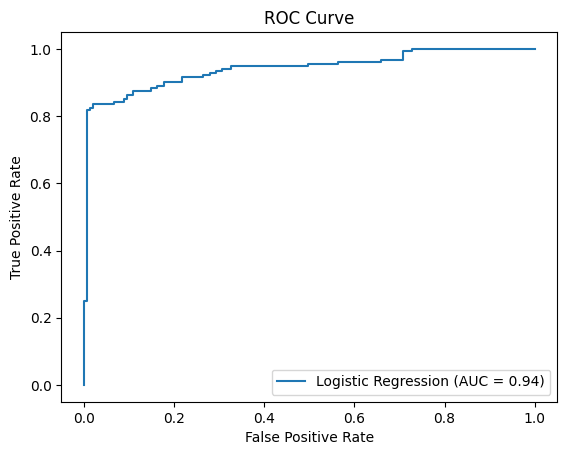

In [22]:
# Logistic Regression ROC Curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_scores_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

- **KNN - ROC Curve:**

This is similar to the Logistic Regression ROC curve block but for KNN. It calculates the False Positive Rate (FPR), True Positive Rate (TPR), and AUC for the KNN model and plots the ROC curve.

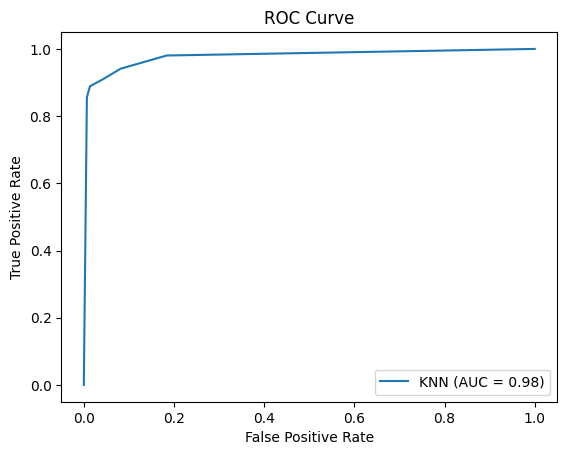

In [23]:
# KNN ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

- **SVC - ROC Curve:**

Similar to the previous blocks, this computes the ROC curve for the SVC model and plots it. It gives an overall evaluation of the SVC model’s predictive performance based on the AUC of the ROC curve.

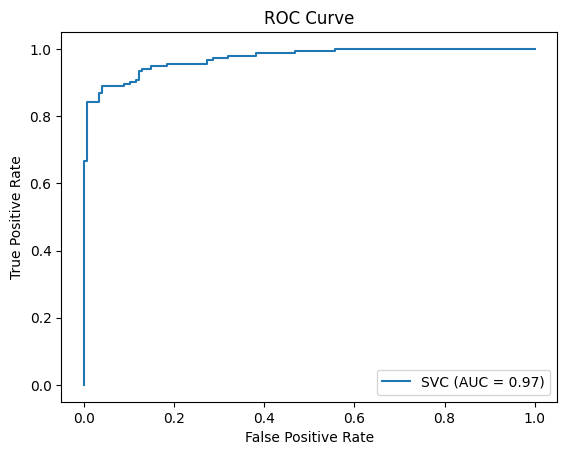

In [24]:
# SVC ROC Curve
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_scores_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {roc_auc_svc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 7. Threshold Analysis:

- **Logistic Regression Threshold Analysis:**
1. This block performs a threshold analysis for the Logistic Regression model. The predicted probabilities are compared to different threshold values (0.3, 0.5, 0.7), and the Precision, Recall, and F1 scores are calculated for each threshold.
2. This analysis helps to understand how changing the threshold affects model performance, particularly in terms of Recall, Precision, and F1.

In [25]:
# Threshold evaluation
# Importing
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

In [26]:
# Get the predicted probabilities for Logistic Regression
y_proba_logreg = log_reg.predict_proba(X_test)[:, 1] 

# Define thresholds for analysis
thresholds = [0.3, 0.5, 0.7]

# Logistic Regression threshold analysis
print("Logistic Regression Threshold Analysis:")
for threshold in thresholds:
    y_pred_logreg_threshold = (y_proba_logreg >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_logreg_threshold)
    recall = recall_score(y_test, y_pred_logreg_threshold)
    f1 = f1_score(y_test, y_pred_logreg_threshold)
    print(f"Threshold {threshold}: Precision = {precision}, Recall = {recall}, F1 Score = {f1}")

Logistic Regression Threshold Analysis:
Threshold 0.3: Precision = 0.8701298701298701, Recall = 0.8758169934640523, F1 Score = 0.8729641693811075
Threshold 0.5: Precision = 0.927536231884058, Recall = 0.8366013071895425, F1 Score = 0.8797250859106529
Threshold 0.7: Precision = 0.9917355371900827, Recall = 0.7843137254901961, F1 Score = 0.8759124087591241


- **SVC Threshold Analysis:**

1. Similar to the Logistic Regression threshold analysis, this block evaluates the SVC model’s performance at different threshold values.
2. The goal is to determine how threshold adjustments affect the SVC model’s trade-off between Precision and Recall.

In [27]:
y_proba_svc = svc.predict_proba(X_test)[:, 1]
print("\nSVC Threshold Analysis:")
for threshold in thresholds:
    y_pred_svc_threshold = (y_proba_svc >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_svc_threshold)
    recall = recall_score(y_test, y_pred_svc_threshold)
    f1 = f1_score(y_test, y_pred_svc_threshold)
    print(f"Threshold {threshold}: Precision = {precision}, Recall = {recall}, F1 Score = {f1}")


SVC Threshold Analysis:
Threshold 0.3: Precision = 0.9133333333333333, Recall = 0.8954248366013072, F1 Score = 0.9042904290429042
Threshold 0.5: Precision = 0.9577464788732394, Recall = 0.8888888888888888, F1 Score = 0.9220338983050848
Threshold 0.7: Precision = 0.9772727272727273, Recall = 0.8431372549019608, F1 Score = 0.9052631578947369


- **KNN Threshold Analysis:**

1. The threshold analysis for KNN follows the same structure as Logistic Regression and SVC, analyzing the model’s performance metrics at different threshold levels.
2. By comparing Precision, Recall, and F1 scores for each threshold, this analysis helps in choosing the right threshold based on the business objective (focusing on Recall to minimize false negatives).

In [28]:
# KNN Threshold Analysis
y_proba_knn = knn.predict_proba(X_test)[:, 1]  # Probabilities for class 1

print("\nKNN Threshold Analysis:")
for threshold in thresholds:
    y_pred_knn_threshold = (y_proba_knn >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_knn_threshold)
    recall = recall_score(y_test, y_pred_knn_threshold)
    f1 = f1_score(y_test, y_pred_knn_threshold)
    print(f"Threshold {threshold}: Precision = {precision}, Recall = {recall}, F1 Score = {f1}")


KNN Threshold Analysis:
Threshold 0.3: Precision = 0.9230769230769231, Recall = 0.9411764705882353, F1 Score = 0.9320388349514563
Threshold 0.5: Precision = 0.9586206896551724, Recall = 0.9084967320261438, F1 Score = 0.9328859060402684
Threshold 0.7: Precision = 0.9855072463768116, Recall = 0.8888888888888888, F1 Score = 0.9347079037800687


### 8. Conclusion:
In the context of this marketing campaign, the goal is to effectively identify potential leads while minimizing both false positives (incorrectly identifying non-leads as leads) and false negatives (failing to identify actual leads). 
After evaluating the three models : Logistic Regression, K-Nearest Neighbors (KNN), and Support Vector Classifier (SVC) we can conclude that the K-Nearest Neighbors (KNN) model is the best choice for this specific campaign. Here’s a detailed breakdown of why KNN is recommended over Logistic Regression and SVC.

**1. Model Performance Metrics:**
Each model's performance is analyzed based on key metrics such as Precision, Recall, F1 Score, Accuracy, and ROC-AUC score. These metrics provide insight into how well the models predict outcomes and handle imbalances in the dataset.

- **Logistic Regression:**
    - **Precision:** 0.93
    - **Recall:** 0.84
    - **F1 Score:** 0.88
    - **Accuracy:** 0.88
    - **ROC-AUC:** 0.94

- **K-Nearest Neighbors (KNN):**
    - **Precision:** 0.96
    - **Recall:** 0.91
    - **F1 Score:** 0.93
    - **Accuracy:** 0.93
    - **ROC-AUC:** 0.98
   
- **Support Vector Classifier (SVC):**
    - **Precision**: 0.98  
    - **Recall**: 0.84  
    - **F1 Score**: 0.91  
    - **Accuracy**: 0.91  
    - **ROC-AUC**: 0.97 
<br>

**2. Importance of Recall in a Marketing Campaign** <br>
For this marketing campaign, Recall is the most crucial metric because it indicates the model's ability to correctly identify leads. In marketing, failing to identify potential customers (false negatives) can result in missed opportunities to engage with interested individuals. Therefore, a model with a higher recall is preferred, even if it slightly compromises precision.

- KNN has the highest recall (0.91), meaning it captures 91% of all potential leads, thereby minimizing the risk of missing out on valuable customers.
Logistic Regression and SVC both have a lower recall (0.84), indicating that these models miss 16% of potential leads, which could translate to significant losses in terms of customer acquisition and revenue for the campaign.
Thus, KNN's superior recall gives it an advantage in this context, as it ensures that fewer genuine leads are missed, aligning with the primary goal of the campaign.

**3. Precision: Balancing False Positives** <br>
Precision, which measures how many of the predicted leads are actual leads, is important in ensuring that marketing efforts are not wasted on non-leads. However, in this campaign, it is acceptable to have a slight trade-off in precision as long as recall remains high, since the cost of reaching out to non-leads (false positives) is generally lower than missing out on actual leads (false negatives). 

- KNN has a precision of 0.96, which is quite high and only slightly lower than SVC (0.98). This means that 96% of the leads predicted by KNN are correct, and it performs well in minimizing false positives while still prioritizing recall.
SVC offers the highest precision (0.98), but at the cost of a lower recall. This suggests that while it makes fewer mistakes in identifying non-leads, it also misses more genuine leads, which is undesirable in this campaign.
Logistic Regression has a lower precision (0.93) compared to KNN and SVC, and its recall is also lower, making it less optimal for this campaign.
Overall, KNN strikes the best balance between precision and recall, ensuring that the majority of leads are accurately predicted while minimizing the number of false positives. <br>

**4. F1 Score: Overall Model Performance** <br>
The F1 Score is the harmonic mean of precision and recall, providing a balanced measure of a model’s performance when both metrics are important. In this case:

- KNN has the highest F1 score (0.93), indicating that it provides the best overall performance by balancing precision and recall. It maximizes lead identification while keeping false positives in check. <br>
SVC has an F1 score of 0.91, slightly lower than KNN, because it sacrifices some recall for higher precision.<br>
Logistic Regression has the lowest F1 score (0.88), meaning it is less effective overall compared to KNN and SVC.<br>

**5. Accuracy and ROC-AUC: Discriminative Ability** <br>
Accuracy is not the most critical metric in this scenario, but it provides a general sense of how well the model performs. All models exhibit high accuracy:

- **KNN:** 0.93
- **SVC:** 0.91
- **Logistic Regression:** 0.88
  
ROC-AUC (Area Under the Receiver Operating Characteristic Curve) gives us an understanding of how well a model can distinguish between classes (lead vs. non-lead). 

A higher AUC score indicates better discriminative ability: <br>
- KNN has the highest AUC (0.98), meaning it has the best ability to distinguish between potential leads and non-leads.
- SVC has an AUC of 0.97, also performing very well.
- Logistic Regression has a slightly lower AUC of 0.94.
- Although all models perform well in terms of AUC, KNN’s superior score reinforces its position as the best model for this campaign.

**6. Implications of False Negatives** <br>
In this marketing campaign, false negatives-instances where actual leads are missed—carry significant implications. A model with a high false-negative rate would fail to target a portion of interested customers, potentially leading to missed sales and revenue.

KNN, with a recall of 0.91, minimizes false negatives, making it the best model for ensuring that the majority of potential customers are reached. This reduces the risk of losing out on valuable leads.
Logistic Regression and SVC, both with lower recall (0.84), would lead to a higher number of false negatives. This could result in lost marketing opportunities, making them less ideal for this specific use case.

**Conclusion:** <br>
Based on the overall analysis of the models, **K-Nearest Neighbors (KNN) is the recommended model for this marketing campaign**. Its high recall ensures that the majority of leads are identified, minimizing missed opportunities (false negatives). It also balances precision and recall well, ensuring that the marketing team’s efforts are focused on genuine leads without wasting too much effort on non-leads (false positives). The high F1 score and AUC further support the conclusion that KNN is the most reliable and effective model for maximizing customer acquisition in this campaign.